# EDA 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


### Cleaned date dataset

In [9]:

# Load the dataset
file_path = 'finished_annotation_5.2k.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure, especially the 'pubDate' column
data.head()

,index,title & content,sentiment_perigon,summary,description,Ticker,Sector,Industry,Company,SASB,...,pubDate_brief,pubDate,url,keywords,categories,entities,content,articleId,title,Unnamed: 28
0,12024,Delays Won‚Äö√Ñ√¥t Hurt Japan‚Äö√Ñ√¥s First Ca...,"{'positive': 0.026093118, 'negative': 0.923414...",Osaka Governor Hirofumi Yoshimura said that th...,Years of delay to plans for Japan‚Äö√Ñ√¥s firs...,MGM,Services,Casinos & Gaming,MGM Resorts International,{'Internal Controls on Money Laundering': 'By ...,...,2023-05-18,2023-05-18T21:25:29+00:00,https://www.dailymail.co.uk/health/article-121...,[{'name': 'identifiable user health informatio...,[{'name': 'Health'}],"[{'data': 'Chinese', 'type': 'NORP', 'mentions...",A popular fertility app used by women to track...,7be6da0f9313404ca02afd000b0e787a,Fertility app used by 500k women sold private ...,NaN
1,20675,MetLife (MET) Could Be a Great Choice - Gettin...,"{'positive': 0.8553927, 'negative': 0.01334850...",MetLife (MET) is a Finance stock that has seen...,Dividends are one of the best benefits to bein...,MET,Financials,Insurance,Metlife Inc,{'Financed Emissions': 'Entities participating...,...,2022-10-31,2022-10-31T20:36:25+00:00,https://nypost.com/2022/10/31/lottery-app-jack...,"[{'name': 'ticket sales', 'weight': 0.10697382...",[],"[{'data': 'Powerball', 'type': 'WORK_OF_ART', ...",You could win Monday night‚Äôs historic $1 bil...,28cbde589b2b4954a5e39dd9df22624e,More and more tickets being sold online as Pow...,NaN
2,33685,New York Cements Itself as the Gold Mining Cap...,"{'positive': 0.46477953, 'negative': 0.0338994...","This week, top-five producer AngloGold Ashanti...",(Bloomberg) -- The momentum has been building ...,NEM,Extractives & Minerals Processing,Metals & Mining,Newmont Corp,{'Tailings Storage Facilities Management': 'Th...,...,2023-02-08,2023-02-08T22:16:21+00:00,https://www.newsmax.com/newsmax-tv/fitzgerald-...,"[{'name': 'Newsmax', 'weight': 0.09317307}, {'...",[{'name': 'Politics'}],"[{'data': 'Fitzgerald', 'type': 'PERSON', 'men...","Rep. Scott Fitzgerald, R-Wis., told Newsmax We...",c12355d81050473e89f4163372441061,Rep. Fitzgerald to Newsmax: DirecTV Dropping N...,NaN
3,12072,"Shareholders v. Tesla, Nasdaq's diversity rule...","{'positive': 0.02043453, 'negative': 0.6323841...",\n\nThe case is In re Tesla Inc Securities Lit...,Some of the biggest securities cases of 2023 a...,NDAQ,Financials,Security & Commodity Exchanges,Nasdaq Inc,{'Managing Conflicts of Interest': 'Security a...,...,2023-05-18,2023-05-18T14:28:52+00:00,https://www.axios.com/pro/media-deals/2023/05/...,"[{'name': 'Google AI', 'weight': 0.09959001}, ...",[{'name': 'Tech'}],"[{'data': 'YouTube', 'type': 'ORG', 'mentions'...",YouTube has embraced AI for causing a massive ...,fcbd16768c584451912d7121a259ad9d,YouTube praises AI transformation at Brandcast,NaN
4,28164,"CFOs Boost Currency Protections, Extend Hedge ...","{'positive': 0.031100325, 'negative': 0.955758...","CFOs Boost Currency Protections, Extend Hedge ...","Coca-Cola, Kimberly-Clark and Prologis are amo...",KO,Food & Beverage,Non-Alcoholic Beverages,Coca-Cola Co,{'Water Management': 'Water management relates...,...,2023-05-04,2023-05-04T23:39:33+00:00,https://www.cnbc.com/2023/05/04/apples-q2-ease...,"[{'name': 'last year', 'weight': 0.0876609}, {...",[{'name': 'Tech'}],"[{'data': 'Apple', 'type': 'ORG', 'mentions': ...",Apple (AAPL) posted a better-than-expected Mar...,7a5fd04f52ef49298c35f0a86e614a4d,Apple's quarter eases concerns about mobile de...,NaN


In [18]:
# Define a function to adjust the date considering the new format
def adjust_date_with_timezone(date):
    # Parse the date string into a datetime object
    date_obj = datetime.fromisoformat(date)
    # Add one day if the time is later than 4 PM
    if date_obj.hour >= 16:
        date_obj += timedelta(days=1)
    # Return the adjusted date in 'yyyy-mm-dd' format
    return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'pubDate' column to create 'adjusted_date'
data['adjusted_date'] = data['pubDate'].apply(adjust_date_with_timezone)

data.head()

# Save the modified dataset to a new file named "adjusted_dataset.xlsx"
#output_file_path = 'adjusted_dataset.xlsx'
#data.to_excel(output_file_path, index=False)

,index,title & content,sentiment_perigon,summary,description,Ticker,Sector,Industry,Company,SASB,...,pubDate,url,keywords,categories,entities,content,articleId,title,Unnamed: 28,adjusted_date
0,12024,Delays Won‚Äö√Ñ√¥t Hurt Japan‚Äö√Ñ√¥s First Ca...,"{'positive': 0.026093118, 'negative': 0.923414...",Osaka Governor Hirofumi Yoshimura said that th...,Years of delay to plans for Japan‚Äö√Ñ√¥s firs...,MGM,Services,Casinos & Gaming,MGM Resorts International,{'Internal Controls on Money Laundering': 'By ...,...,2023-05-18T21:25:29+00:00,https://www.dailymail.co.uk/health/article-121...,[{'name': 'identifiable user health informatio...,[{'name': 'Health'}],"[{'data': 'Chinese', 'type': 'NORP', 'mentions...",A popular fertility app used by women to track...,7be6da0f9313404ca02afd000b0e787a,Fertility app used by 500k women sold private ...,NaN,2023-05-19
1,20675,MetLife (MET) Could Be a Great Choice - Gettin...,"{'positive': 0.8553927, 'negative': 0.01334850...",MetLife (MET) is a Finance stock that has seen...,Dividends are one of the best benefits to bein...,MET,Financials,Insurance,Metlife Inc,{'Financed Emissions': 'Entities participating...,...,2022-10-31T20:36:25+00:00,https://nypost.com/2022/10/31/lottery-app-jack...,"[{'name': 'ticket sales', 'weight': 0.10697382...",[],"[{'data': 'Powerball', 'type': 'WORK_OF_ART', ...",You could win Monday night‚Äôs historic $1 bil...,28cbde589b2b4954a5e39dd9df22624e,More and more tickets being sold online as Pow...,NaN,2022-11-01
2,33685,New York Cements Itself as the Gold Mining Cap...,"{'positive': 0.46477953, 'negative': 0.0338994...","This week, top-five producer AngloGold Ashanti...",(Bloomberg) -- The momentum has been building ...,NEM,Extractives & Minerals Processing,Metals & Mining,Newmont Corp,{'Tailings Storage Facilities Management': 'Th...,...,2023-02-08T22:16:21+00:00,https://www.newsmax.com/newsmax-tv/fitzgerald-...,"[{'name': 'Newsmax', 'weight': 0.09317307}, {'...",[{'name': 'Politics'}],"[{'data': 'Fitzgerald', 'type': 'PERSON', 'men...","Rep. Scott Fitzgerald, R-Wis., told Newsmax We...",c12355d81050473e89f4163372441061,Rep. Fitzgerald to Newsmax: DirecTV Dropping N...,NaN,2023-02-09
3,12072,"Shareholders v. Tesla, Nasdaq's diversity rule...","{'positive': 0.02043453, 'negative': 0.6323841...",\n\nThe case is In re Tesla Inc Securities Lit...,Some of the biggest securities cases of 2023 a...,NDAQ,Financials,Security & Commodity Exchanges,Nasdaq Inc,{'Managing Conflicts of Interest': 'Security a...,...,2023-05-18T14:28:52+00:00,https://www.axios.com/pro/media-deals/2023/05/...,"[{'name': 'Google AI', 'weight': 0.09959001}, ...",[{'name': 'Tech'}],"[{'data': 'YouTube', 'type': 'ORG', 'mentions'...",YouTube has embraced AI for causing a massive ...,fcbd16768c584451912d7121a259ad9d,YouTube praises AI transformation at Brandcast,NaN,2023-05-18
4,28164,"CFOs Boost Currency Protections, Extend Hedge ...","{'positive': 0.031100325, 'negative': 0.955758...","CFOs Boost Currency Protections, Extend Hedge ...","Coca-Cola, Kimberly-Clark and Prologis are amo...",KO,Food & Beverage,Non-Alcoholic Beverages,Coca-Cola Co,{'Water Management': 'Water management relates...,...,2023-05-04T23:39:33+00:00,https://www.cnbc.com/2023/05/04/apples-q2-ease...,"[{'name': 'last year', 'weight': 0.0876609}, {...",[{'name': 'Tech'}],"[{'data': 'Apple', 'type': 'ORG', 'mentions': ...",Apple (AAPL) posted a better-than-expected Mar...,7a5fd04f52ef49298c35f0a86e614a4d,Apple's quarter eases concerns about mobile de...,NaN,2023-05-05


### Article Published Frequencies Associated with top 40 companies 

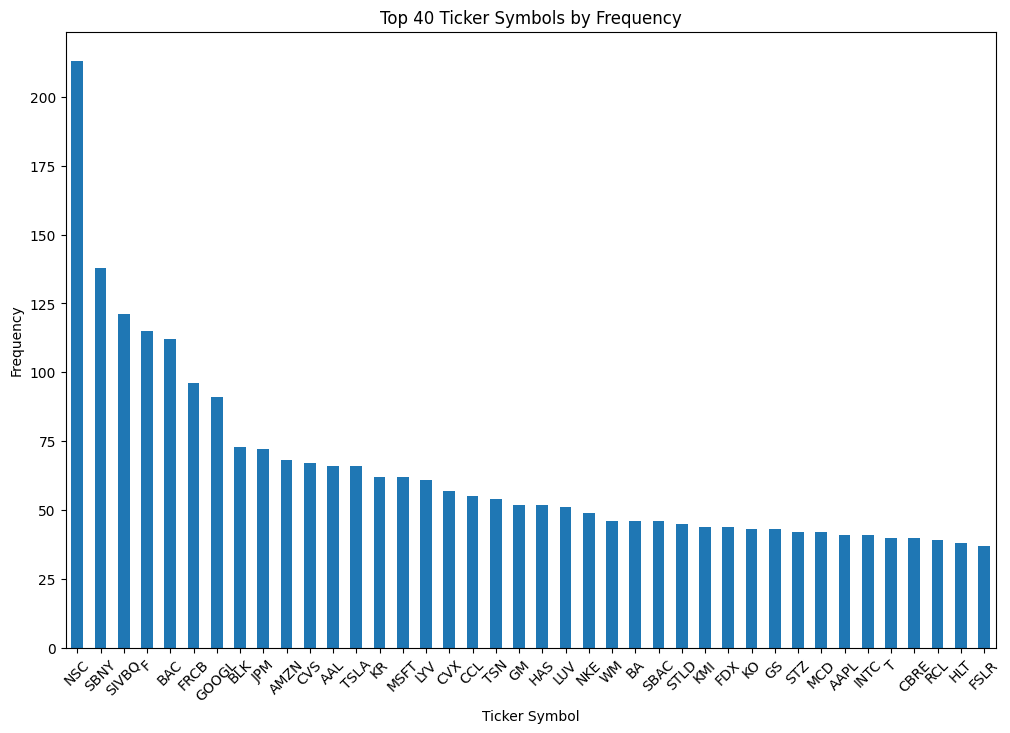

In [8]:
# Load the dataset
file_path = 'finished_annotation_5.2k.xlsx'
data = pd.read_excel(file_path)

# Count the frequency of each unique ticker
ticker_counts = data['Ticker'].value_counts()

# Selecting the top 40 most frequent tickers
top_40_tickers = ticker_counts.head(40)


# Plotting the top 40 tickers
plt.figure(figsize=(12, 8))
top_40_tickers.plot(kind='bar')
plt.title('Top 40 Ticker Symbols by Frequency')
plt.xlabel('Ticker Symbol')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

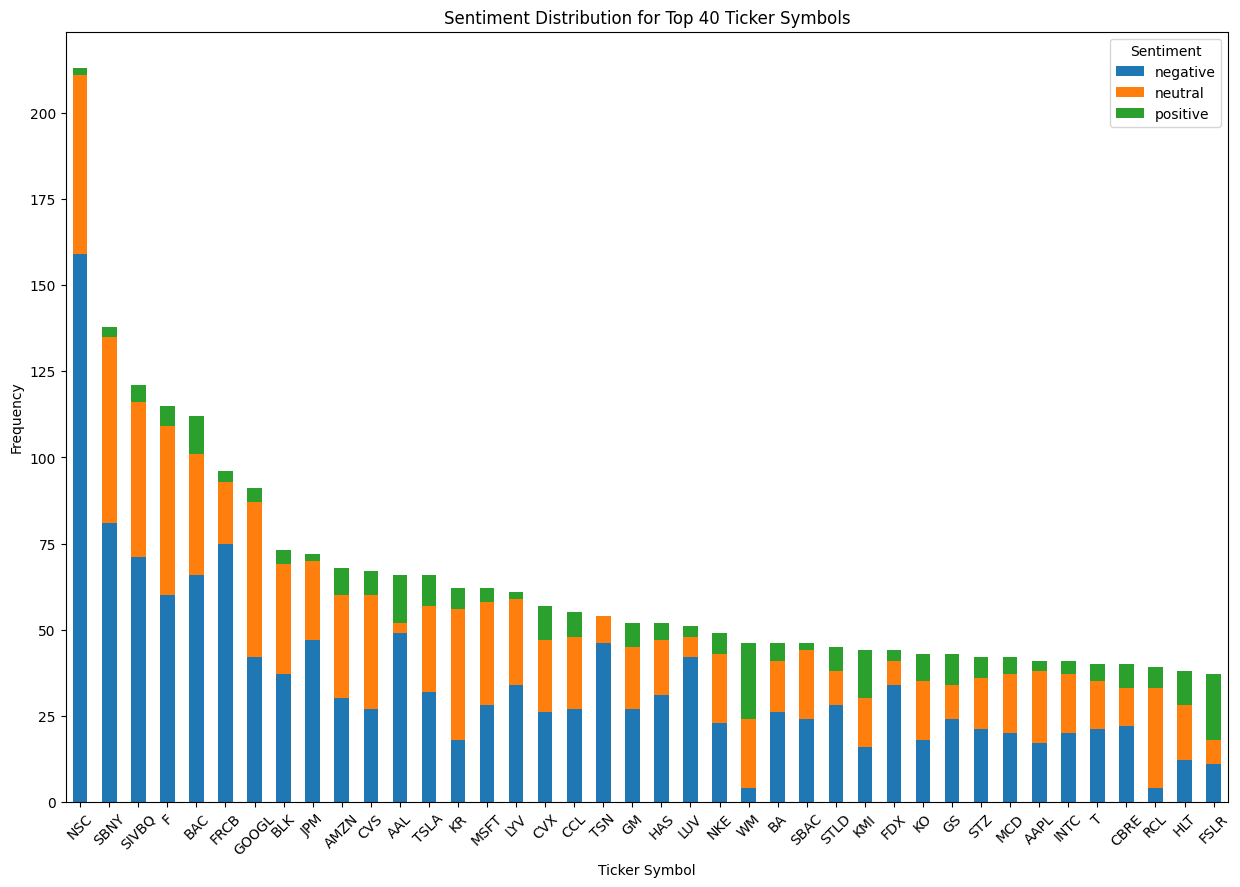

In [26]:


# Function to determine the highest sentiment category in 'sentiment_perigon'
def get_highest_sentiment(sentiment_dict):
    if isinstance(sentiment_dict, str):
        # Convert string representation to dictionary
        sentiment_dict = eval(sentiment_dict)
    if not isinstance(sentiment_dict, dict):
        return None
    return max(sentiment_dict, key=sentiment_dict.get)

# Apply the function to get the highest sentiment for each row in 'sentiment_perigon'
data['highest_sentiment'] = data['sentiment_perigon'].apply(get_highest_sentiment)

# Count the frequency of each unique ticker
ticker_counts = data['Ticker'].value_counts()

# Selecting the top 40 most frequent tickers
top_40_tickers = ticker_counts.head(40)

# Group by 'Ticker' and 'highest_sentiment', then count occurrences
sentiment_counts = data.groupby(['Ticker', 'highest_sentiment']).size().unstack(fill_value=0)

# Filtering to include only the top 40 tickers
top_40_sentiment_counts = sentiment_counts.loc[top_40_tickers.index]

# Plotting the stacked bar chart for the top 40 tickers
plt.figure(figsize=(15, 10))
top_40_sentiment_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sentiment Distribution for Top 40 Ticker Symbols')
plt.xlabel('Ticker Symbol')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


### Ticker by industry

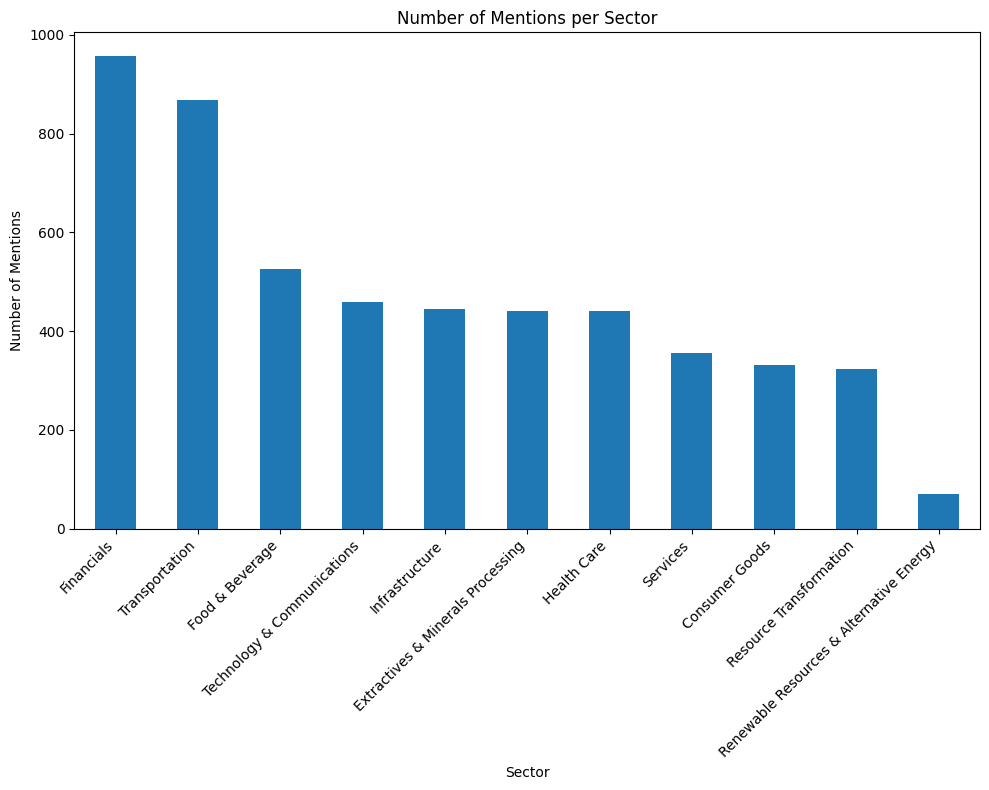

In [20]:
# Count how many times each Sector has been mentioned
sector_counts = data['Sector'].value_counts()

# Create a bar chart for the Sector counts
plt.figure(figsize=(10,8))
sector_counts.plot(kind='bar')
plt.title('Number of Mentions per Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping


### Perentage of human_label matches with perigon

In [22]:
# Filtering out rows where 'human_label_sentiment' is 'No'
filtered_data = data[data['human_label_sentiment'] != 'No']

# Function to determine the highest sentiment category in 'sentiment_perigon'
def get_highest_sentiment(sentiment_dict):
    if isinstance(sentiment_dict, str):
        # Convert string representation to dictionary
        sentiment_dict = eval(sentiment_dict)
    if not isinstance(sentiment_dict, dict):
        return None
    return max(sentiment_dict, key=sentiment_dict.get)

# Applying the function to get the highest sentiment for each row in 'sentiment_perigon'
filtered_data['predicted_sentiment'] = filtered_data['sentiment_perigon'].apply(get_highest_sentiment)


# Function to match sentiments including 'Neutral'
def match_all_sentiments(perigon_sentiment, human_label):
    return (perigon_sentiment == 'positive' and human_label == 'Positive') or \
           (perigon_sentiment == 'negative' and human_label == 'Negative') or \
           (perigon_sentiment == 'neutral' and human_label == 'Neutral')

# Applying the matching criteria for all sentiment categories
filtered_data['is_match_all'] = filtered_data.apply(
    lambda row: match_all_sentiments(row['predicted_sentiment'], row['human_label_sentiment']), axis=1)

# Calculating the accuracy
correct_matches_all = filtered_data['is_match_all'].sum()
total = len(filtered_data)
accuracy_all_categories = correct_matches_all / total if total > 0 else 0

print(accuracy_all_categories)

filtered_data.head()

0.5573221757322175


/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_91517/3867891901.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['predicted_sentiment'] = filtered_data['sentiment_perigon'].apply(get_highest_sentiment)
/var/folders/f3/vz1sy2ys7gqd088dkmc5v9cw0000gn/T/ipykernel_91517/3867891901.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_match_all'] = filtered_data.apply(


,index,title & content,sentiment_perigon,summary,description,Ticker,Sector,Industry,Company,SASB,...,keywords,categories,entities,content,articleId,title,Unnamed: 28,adjusted_date,predicted_sentiment,is_match_all
3,12072,"Shareholders v. Tesla, Nasdaq's diversity rule...","{'positive': 0.02043453, 'negative': 0.6323841...",\n\nThe case is In re Tesla Inc Securities Lit...,Some of the biggest securities cases of 2023 a...,NDAQ,Financials,Security & Commodity Exchanges,Nasdaq Inc,{'Managing Conflicts of Interest': 'Security a...,...,"[{'name': 'Google AI', 'weight': 0.09959001}, ...",[{'name': 'Tech'}],"[{'data': 'YouTube', 'type': 'ORG', 'mentions'...",YouTube has embraced AI for causing a massive ...,fcbd16768c584451912d7121a259ad9d,YouTube praises AI transformation at Brandcast,NaN,2023-05-18,negative,False
5,17931,Robert Half Named One of Barron's Most Sustain...,"{'positive': 0.22606649, 'negative': 0.0087869...",Robert Half (NYSE: RHI) has been named one of ...,Global talent solutions and business consultin...,RHI,Services,Professional & Commercial Services,Robert Half Inc,{'Professional Integrity': 'The business model...,...,"[{'name': 'leggings', 'weight': 0.08487634}, {...",[{'name': 'Lifestyle'}],"[{'data': 'the Dokotoo Tunic Top', 'type': 'PR...","It's (finally) June, not exactly summer yet bu...",70f468d08f314bb1866b8b8943f5c24d,‚ÄòCovers your tummy and looks great‚Äô: Shopp...,NaN,2023-06-08,neutral,False
6,15389,The new electric USPS mail truck is America‚Äö...,"{'positive': 0.04448583, 'negative': 0.6695711...",The $9.6 billion investment for mail trucks an...,A new fleet of electric mail trucks heralds th...,UPS,Transportation,Air Freight & Logistics,United Parcel Service Inc B,{'Greenhouse Gas Emissions': 'Air Freight & Lo...,...,"[{'name': 'last year', 'weight': 0.08339562}, ...",[{'name': 'Finance'}],"[{'data': 'US', 'type': 'GPE', 'mentions': 2},...",(Bloomberg) -- Mortgage rates in the US rose f...,9d91fc353772453697b247bc4c80c2a3,Mortgage Rates in the US Rise for the First Ti...,NaN,2022-12-30,negative,False
8,10731,"FedEx closing more locations, planning to furl...","{'positive': 0.02241792, 'negative': 0.9375396...",FedEx announced on Monday that it will close 2...,FedEx announced on Monday that it will close 2...,FDX,Transportation,Air Freight & Logistics,FedEx Corp,{'Greenhouse Gas Emissions': 'Air Freight & Lo...,...,"[{'name': 'AI models', 'weight': 0.13278106}, ...",[{'name': 'Tech'}],"[{'data': 'Nick Clegg', 'type': 'PERSON', 'men...",Nick Clegg has defended the release of an open...,3cb0ea7cb1cb40608c1cfc1e172ebc3e,Nick Clegg defends release of open-source AI m...,NaN,2023-07-19,negative,True
9,7801,"FedEx Parks Planes, Maersk Cancels Sails: Worl...","{'positive': 0.0276921, 'negative': 0.91408736...",Economic storm clouds are gathering worldwide ...,"FedEx Parks Planes, Maersk Cancels Sails: Worl...",FDX,Transportation,Air Freight & Logistics,FedEx Corp,{'Greenhouse Gas Emissions': 'Air Freight & Lo...,...,"[{'name': 'Available Updates', 'weight': 0.093...",[{'name': 'Tech'}],"[{'data': 'The New Year', 'type': 'EVENT', 'me...",The New Year is a great time to ensure that al...,8fa35beec4c8419cba9c5bcc287554c8,Start your year off by making sure all your de...,NaN,2023-01-04,negative,True
